# Nanocompore SampCompDB API demo 

Whether ran from the CLI or API `SampComp` creates a python object database (shelve DBM) containing the statistical analysis results. 
The API directly returns a `SampCompDB` object wrapping the shelve. It is also possible to reload the `SampCompDB` latter using the db file path prefix. `SampCompDB` also need a FASTA file to get the corresponding reference id sequence and accept an optional BED file containing genomic annotations. SampCompDB provide a large selection of simple high level function to plot and export the results.

## Import SampCompDB module

In [2]:
from nanocompore.SampCompDB import SampCompDB
from nanocompore.common import jhelp

## SampCompDB API documentation

In [3]:
jhelp(SampCompDB)

---

**nanocompore.SampCompDB.\__init__**

Import a shelve db and a fasta reference file. Automatically returned by SampComp Can also be manually created from an existing shelve db output

---

* **db_prefix** *: file_prefix_path (required)*

Prefix of the database. For example if the path to the db file is "/outpath/out.db" the db_prefix is "/outpath/out"

* **fasta_fn** *: file_path (required)*

Path to a fasta file corresponding to the reference used for read alignemnt

* **bed_fn** *: file_path (default = None)*

Path to a BED file containing the annotation of the transcriptome used as reference when mapping

* **run_type** *: str {RNA,DNA} (default = RNA)*

Define the run type model to import (RNA or DNA)

* **log_level** *: str {warning,info,debug} (default = info)*

Set the log level.



## Initialise SampCompDB

In [3]:
db = SampCompDB(db_prefix= "./results/out_", fasta_fn="./reference/ref.fa")
print (db)

Loading SampCompDB
Calculate results


[SampCompDB]
	package_name: nanocompore
	package_version: 1.0.0b6
	timestamp: 2019-03-29 20:48:46.356623
	comparison_methods: ['GMM', 'KS']
	pvalue_tests: ['GMM_anova_pvalue', 'KS_dwell_pvalue', 'KS_intensity_pvalue']
	sequence_context: 0
	min_coverage: 30
	n_samples: 4
	Number of references: 5



In [ ]:
db.plot_pvalue("ref_0001")
db.plot_coverage("ref_0001", split_samples=True)
db.plot_signal("ref_0001", 100, 125, kind="swarmplot", split_samples=True)
db.plot_position("ref_0001", 110, )

### Explore results

SampComp creates a shelve database containing results for all positions with sufficient coverage. At the end of the run it returns a SampCompDB object wrapping the shelve.

It is also possible to reload the object latter using the db file path. SampCompDB also need a fasta file path to get the corresponding reference id sequence.

SampCompDB provide simple high level function to plot, explore and export the results

Per position data can be accessed using a simple dictionary interface

In [4]:
res ["YHR174W"][824]

OrderedDict([('S1_median',
              array([120.565   , 113.362   , 117.869   , 118.9255  , 119.053   ,
                     119.999   , 116.393   , 119.008   , 117.731   , 117.959   ,
                     119.6815  , 109.576996, 117.103   , 117.565   , 118.172   ,
                     118.649   , 117.3435  , 117.266   , 117.4425  , 118.993   ,
                     116.791   , 116.303   , 118.35    , 118.697   , 113.673   ,
                     118.455   , 117.201   , 117.061   , 121.5815  , 117.231   ,
                     119.597   , 120.9925  , 119.61    , 123.097   , 113.4445  ,
                     117.849   , 117.777   , 115.559494, 117.892   , 118.161   ,
                     117.743   , 119.229   , 117.74    , 119.947   , 120.598   ,
                     117.902   , 118.763504])),
             ('S2_median',
              array([116.994995, 118.59    , 118.288   , 119.395   , 117.274   ,
                     115.047   , 118.277   , 117.677   , 115.933   , 116.393005,
       

P-values can be easily visualized per position using the *plot_pvalue* method

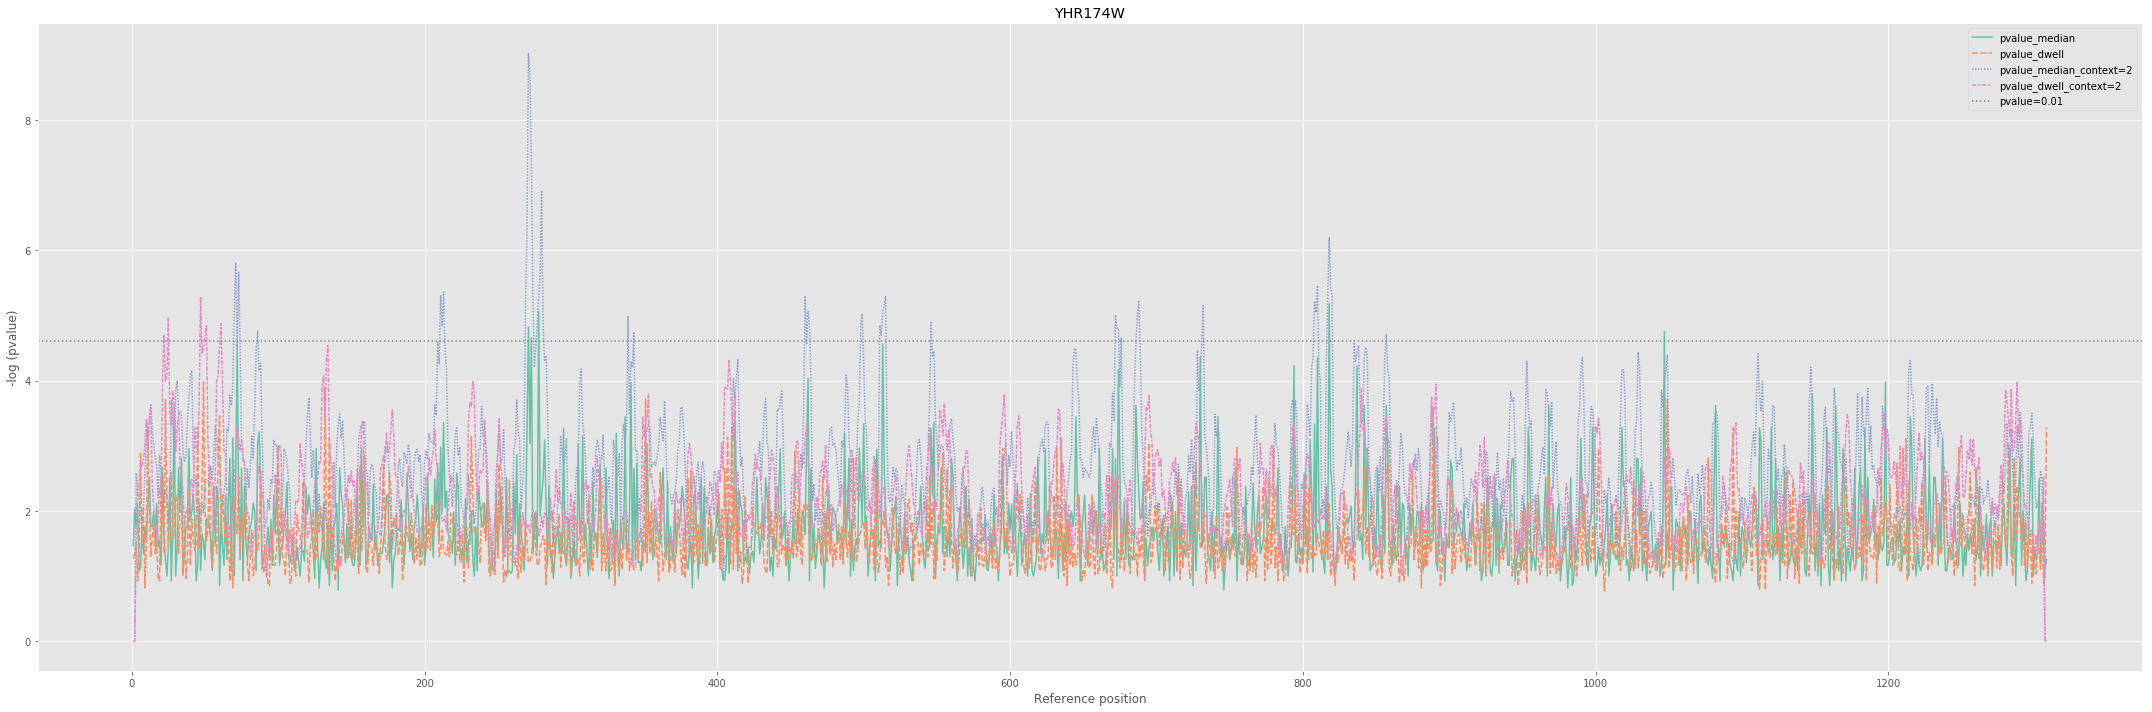

In [5]:
fig, ax = res.plot_pvalue ("YHR174W")

And the original data of the positions of interest can be investigated further with the *plot_signal* method

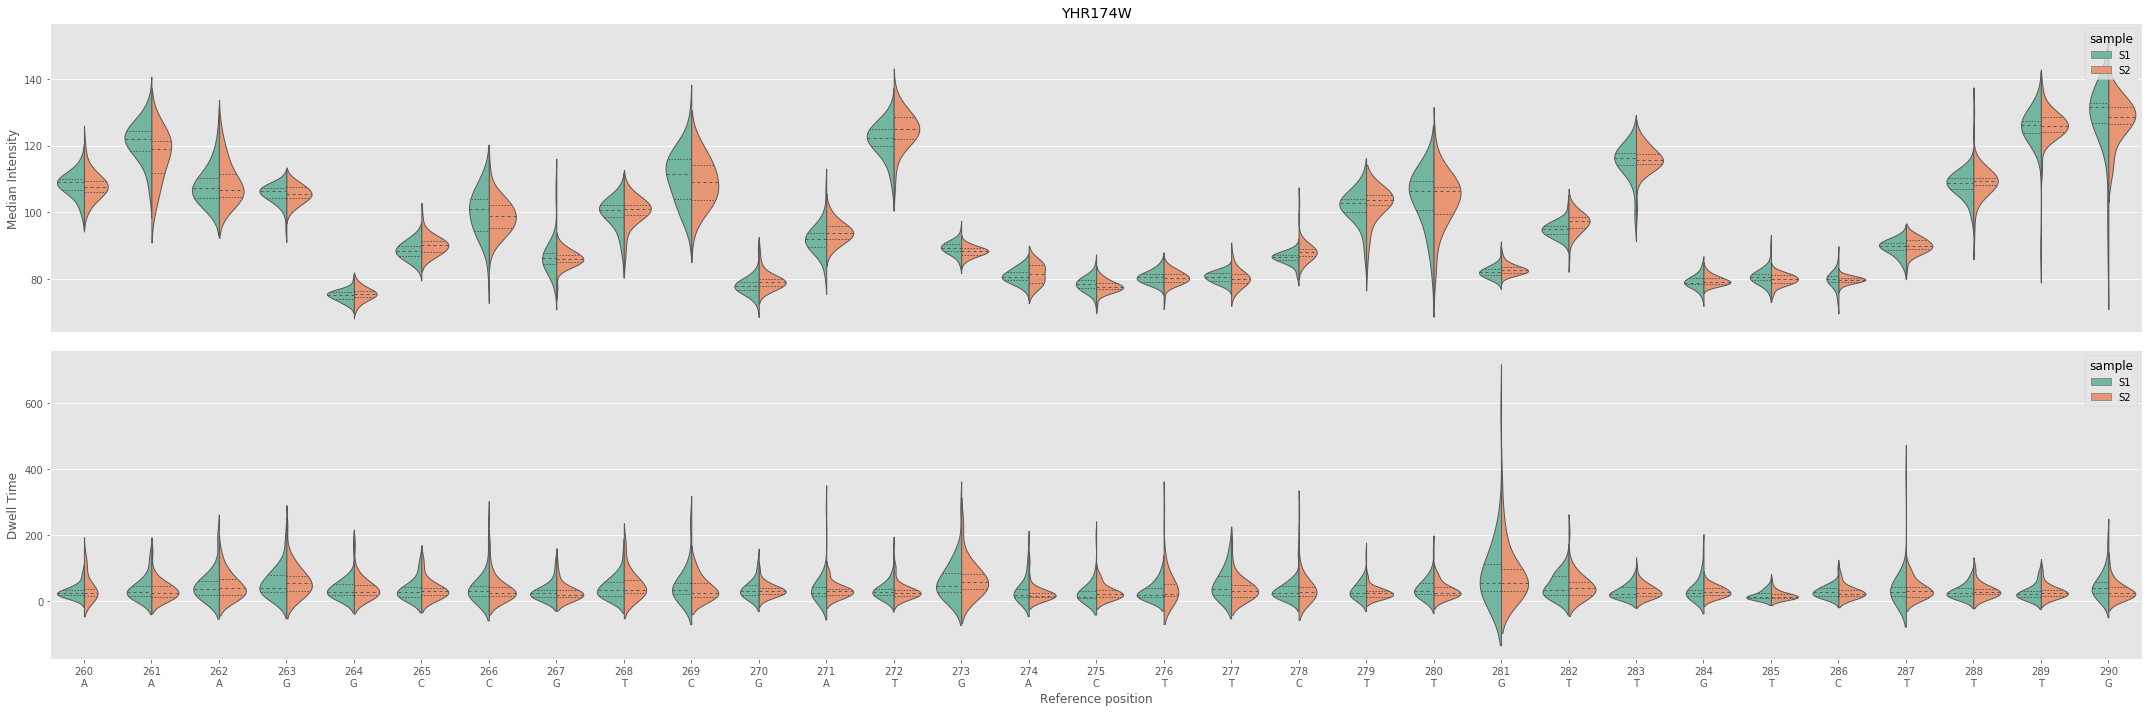

In [8]:
fig, axes = res.plot_signal("YHR174W", start=260, end=290)